In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
df = pd.read_csv('D:\\Practice CSV\\(Rape Cases) India 1970 - 2020\\State wise Sexual Assault (Detailed) 1999 - 2013.csv')

df.head()

,STATE/UT,YEAR,No. Of Cases In Which Offenders Were Known To The Victims,No. Of Cases In Which Offenders Were Parents / Close Family Members,No. Of Cases In Which Offenders Were Relatives,No. Of Cases In Which Offenders Were Neighbours,No. Of Cases In Which Offenders Were Other Known Persons
0,Andhra Pradesh,2001,871,4,81,247,539
1,Andhra Pradesh,2002,999,5,94,302,598
2,Andhra Pradesh,2003,946,15,82,299,550
3,Andhra Pradesh,2004,924,5,69,313,537
4,Andhra Pradesh,2005,935,18,98,399,420


# Data Cleaning and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 7 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   STATE/UT                                                             513 non-null    object
 1   YEAR                                                                 513 non-null    int64 
 2   No. Of Cases In Which Offenders Were Known To The Victims            513 non-null    object
 3   No. Of Cases In Which Offenders Were Parents / Close Family Members  513 non-null    object
 4   No. Of Cases In Which Offenders Were Relatives                       513 non-null    object
 5   No. Of Cases In Which Offenders Were Neighbours                      513 non-null    object
 6   No. Of Cases In Which Offenders Were Other Known Persons             513 non-null    object
dtypes: int64(1), objec

In [4]:
df.isnull().sum()

STATE/UT                                                               0
YEAR                                                                   0
No. Of Cases In Which Offenders Were Known To The Victims              0
No. Of Cases In Which Offenders Were Parents / Close Family Members    0
No. Of Cases In Which Offenders Were Relatives                         0
No. Of Cases In Which Offenders Were Neighbours                        0
No. Of Cases In Which Offenders Were Other Known Persons               0
dtype: int64

In [3]:
columns_to_convert = ['No. Of Cases In Which Offenders Were Known To The Victims',
       'No. Of Cases In Which Offenders Were Parents / Close Family Members',
       'No. Of Cases In Which Offenders Were Relatives',
       'No. Of Cases In Which Offenders Were Neighbours',
       'No. Of Cases In Which Offenders Were Other Known Persons']

# Replace 'NR' with NaN or a specific integer value (e.g., 0)
df[columns_to_convert] = df[columns_to_convert].replace('NR', 0)

df[columns_to_convert] = df[columns_to_convert].astype('int64')

# Calculate yearly basic statistics (mean, median) for the number of cases where offenders were known to the victims

In [6]:
avg_known = df.groupby('YEAR')['No. Of Cases In Which Offenders Were Known To The Victims'].mean()

avg_known

YEAR
1999    688.344828
2001    385.828571
2002    415.342857
2003    393.771429
2004    446.257143
2005    453.400000
2006    415.314286
2007    548.228571
2008    558.342857
2009    580.314286
2010    616.171429
2011    644.257143
2012    699.142857
2013    908.771429
Name: No. Of Cases In Which Offenders Were Known To The Victims, dtype: float64

In [7]:
median_known = df.groupby('YEAR')['No. Of Cases In Which Offenders Were Known To The Victims'].median()

median_known

YEAR
1999     39.5
2001    169.0
2002    186.0
2003    202.0
2004    206.0
2005    201.0
2006    250.0
2007    275.0
2008    347.0
2009    325.0
2010    404.0
2011    352.0
2012    461.0
2013    422.0
Name: No. Of Cases In Which Offenders Were Known To The Victims, dtype: float64

# Plot a line graph to show the trend of cases over the years for "West Bengal"

In [6]:
west_bengal_data = df[df['STATE/UT'] == 'West Bengal']

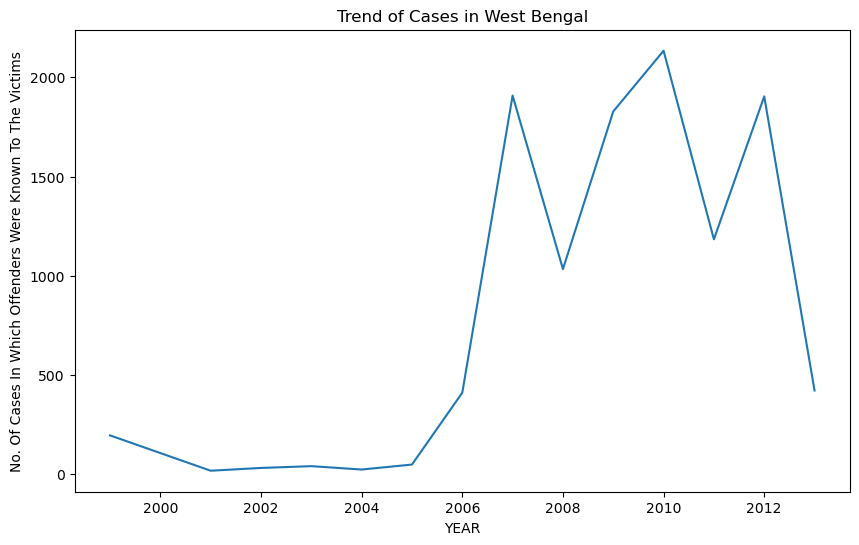

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='No. Of Cases In Which Offenders Were Known To The Victims', data=west_bengal_data)
plt.title('Trend of Cases in West Bengal')
plt.show()

# Correlation Analysis

<Axes: >

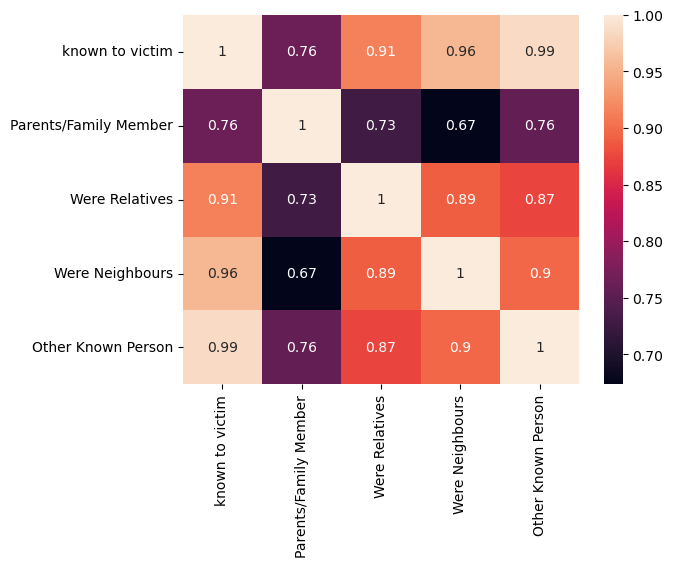

In [8]:
correlation = df[['No. Of Cases In Which Offenders Were Known To The Victims',
       'No. Of Cases In Which Offenders Were Parents / Close Family Members',
       'No. Of Cases In Which Offenders Were Relatives',
       'No. Of Cases In Which Offenders Were Neighbours',
       'No. Of Cases In Which Offenders Were Other Known Persons']].corr()

# Shortened labels
short_labels = ["known to victim", "Parents/Family Member", "Were Relatives", "Were Neighbours", "Other Known Person"]

sns.heatmap(correlation, annot = True, xticklabels = short_labels, yticklabels = short_labels)

#  Compare the total number of cases involving known offenders across multiple states.

In [9]:
Known_data = df.groupby('STATE/UT')['No. Of Cases In Which Offenders Were Known To The Victims'].sum().sort_values(ascending=False).head(8)
Known_data

STATE/UT
Madhya Pradesh    39602
Uttar Pradesh     22524
Maharashtra       22005
Assam             18688
Rajasthan         18474
Andhra Pradesh    15914
Bihar             15537
Chhattisgarh      13202
Name: No. Of Cases In Which Offenders Were Known To The Victims, dtype: int64

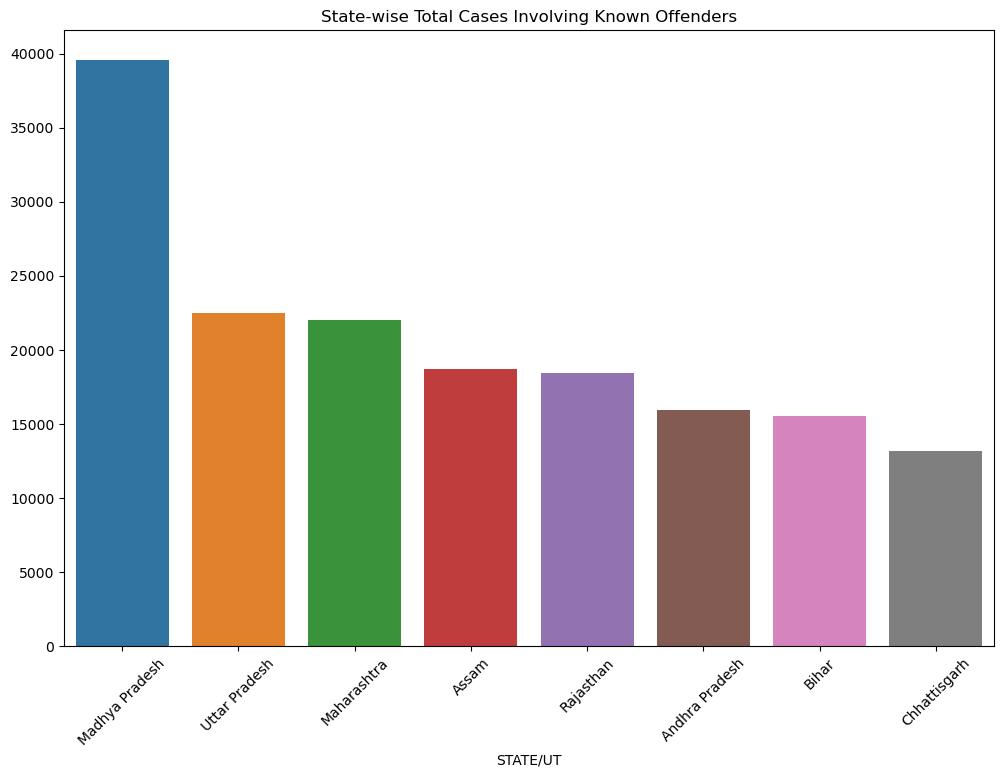

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(x=Known_data.index, y=Known_data.values)
plt.title('State-wise Total Cases Involving Known Offenders')
plt.xticks(rotation = 45)
plt.show()

# Analyze the yearly distribution of different offender types (relatives, neighbors, etc.) in a state

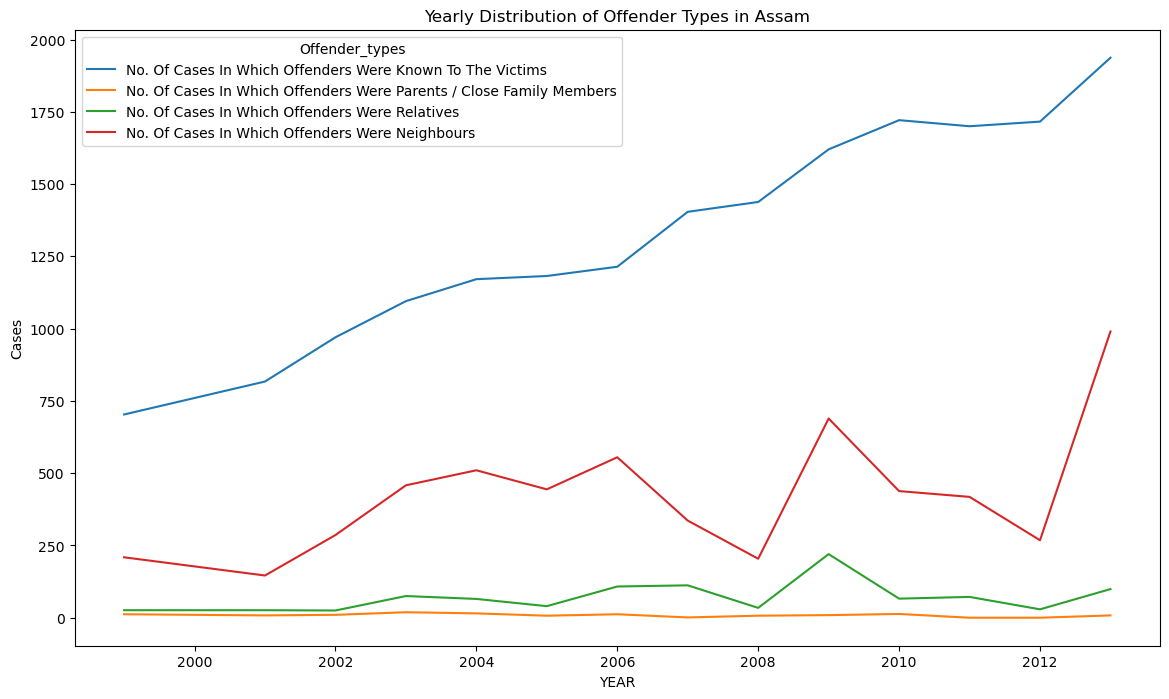

In [11]:
offender_types = ['No. Of Cases In Which Offenders Were Known To The Victims',
       'No. Of Cases In Which Offenders Were Parents / Close Family Members',
       'No. Of Cases In Which Offenders Were Relatives',
       'No. Of Cases In Which Offenders Were Neighbours']
df_melted = pd.melt(df, id_vars = ['STATE/UT', 'YEAR'], value_vars = offender_types, var_name = 'Offender_types', value_name = 'Cases')

plt.figure(figsize=(14, 8))
sns.lineplot(x='YEAR', y='Cases', data=df_melted[df_melted['STATE/UT']=='Assam'], hue='Offender_types')
plt.title('Yearly Distribution of Offender Types in Assam')
plt.show()

# Calculate and visualize the cumulative number of cases over time for 'Maharashtra'

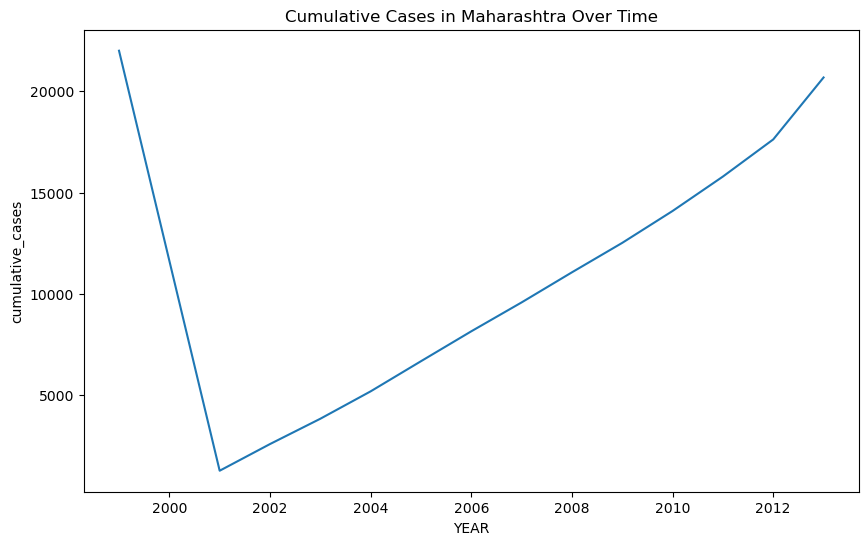

In [15]:
df['cumulative_cases'] = df.groupby('STATE/UT')['No. Of Cases In Which Offenders Were Known To The Victims'].cumsum()
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='cumulative_cases', data=df[df['STATE/UT']=='Maharashtra'])
plt.title('Cumulative Cases in Maharashtra Over Time')
plt.show()

# Top States with Highest Offender Cases

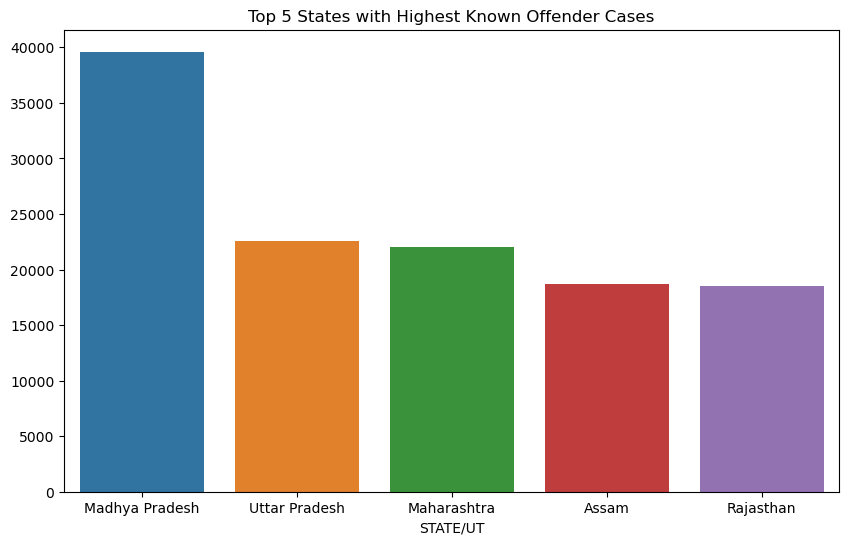

In [16]:
top_states = df.groupby('STATE/UT')['No. Of Cases In Which Offenders Were Known To The Victims'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 5 States with Highest Known Offender Cases')
plt.show()

# Create a pivot table to summarize the data for different offender types across states and years

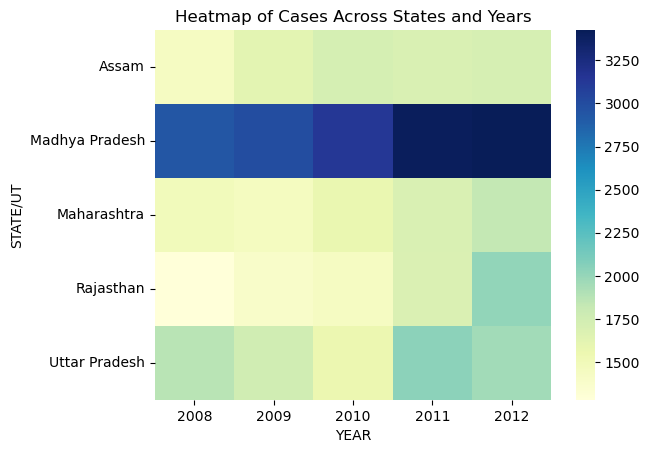

In [12]:
top_state = ['Madhya Pradesh', 'Uttar Pradesh', 'Maharashtra', 'Assam', 'Rajasthan']
top_year = [2008, 2009, 2010, 2011,2012]

#Usage of isin() for Multiple Values in the list 
main_data = df[(df['STATE/UT'].isin(top_state)) & (df['YEAR'].isin(top_year))]

pivot_table = main_data.pivot_table(index='STATE/UT', columns='YEAR', values='No. Of Cases In Which Offenders Were Known To The Victims', aggfunc='sum', fill_value=0)
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Cases Across States and Years')
plt.show()

In [13]:
pivot_table

YEAR,2008,2009,2010,2011,2012
STATE/UT,,,,,
Assam,1438,1620,1721,1700,1716
Madhya Pradesh,2937,2998,3135,3406,3425
Maharashtra,1485,1454,1573,1699,1832
Rajasthan,1282,1398,1437,1689,2013
Uttar Pradesh,1871,1759,1562,2042,1953
